# Bibliotecas

In [14]:
import statistics
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  <a name="indice">  Índice </a>

* [1.0 Objetivo.](#secao_1.0)
* [2.0 Seleção de Variáveis de interece.](#secao_2.0)
  * [2.1 Importando os dados.](#secao_2.1)

* [3.0 Qualidade dos dados.](#secao_3.0)
 
  * [3.1 Pessoas que faltaram as provas.](#secao_3.1)
  * [3.2 Pessoas que Tiraram 0 em alguma prova.](#secao_3.2)


  * [3.3 Treineiros.](#secao_3.3)
  * [3.4 Pessoas que só vão concluir o ensino medio depois de 2019
.](#secao_3.4) 

  * [3.5 Setor admistrativo das escolas.](#secao_3.5)
  * [3.6 Dados faltantes.](#secao_3.6)
  * [3.7 Dados não preenchidos.](#secao_3.7)   
  

* [4.0  Remapeamento das classes.](#secao_4.0)
  * [4.1 Cor/raça.](#secao_4.1)
  * [4.2 Escolariade dos país.](#secao_4.2) 
  * [4.3 Computador e internet.](#secao_4.3) 
  * [4.4 Nota média.](#secao_4.4) 
  * [4.5 Sexo.](#secao_4.5) 
  * [4.6 Colégio.](#secao_4.6)
   


* [5.0  Salvando os novos dados.](#secao_5.0)

* [6.0  Salvando os novos dados.](#secao_6.0)






# <a name="secao_1.0"> 1. Objetivo </a>.

* Essa parte do projeto tem como objetivo principal avaliar a qualidade dos dados. Para que possa ser montada uma estratégia para recuperar ou deletar os dados faltantes e deletar e julgar se existe algum dado irrelevante que possa ser deletado.  


# <a name="secao_2.0"> 2. Variáveis de interece </a>.

* As variáveis dos metadados do Enem existem informações que estão sendo representada mais de uma vez.
 
 * No caso, são aquelas que identificam algum tipo de lugar, como a cidade que a pessoa fez a prova ou onde ela nasceu por exemplo.
 * Essas informações geralmente estão sendo representadas através da Sigla do município, o seu nome ou um código que o representa. 

 
* Existem algumas variáveis que indicam o código da provas, no caso se ela é roxa, azul etc. Estes dados também serão excluídos.
 
* Em relação ao questionário de perguntas serão descartadas aqueles que não geraria nenhum impacto nas analises ou que possam ser representadas de uma forma por outras.
 
* Os dados presentes nas perguntas 'Q007', 'Q008', 'Q009', 'Q010', 'Q011',   'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022','Q023' e 'Q024' são fatores que esta correlacionada diretamente com a sua renda que esta representada pela variável Q006. Por esse motivo os dados dessas perguntas serão excluídas.
 * O uso da internet não será descartado porque ela pode ser utilizada como método de auxilio ao estudo.
 * 'Q03' e 'Q04' são opções que indicam a profissão das pessoas, elas estão relacionadas com trabalhos dos pais das pessoas, estas informações foram julgadas como redundante para o trabalho.
 
* Os dados Q024 e Q025 são ferramentas utilizadas que podem ser utilizadas para auxiliar no estudo do aluno, por isso elas não serão descartadas.
 
 
* Outras variáveis também serão descartas
 * NU_ANO: Esta variável foi descartada porque ela indica uma unica informação.
 *NO_MUNICIPIO_NASCIMENTO: ela indica onde a pessoa nasceu, tão dado não implica em nenhum fator social devido que a pessoa possa ter mudado.
 *TP_LINGUA: indica a lingua da prova estrangeira que a pessoa fez.
 *TP_NACIONALIDADE: Indica se a pessoa é de outro país que esta fazendo a prova.
 *TP_SIT_FUNC_ESC: esse dado indica a sintuação da escola.
 
* Os dados dos pedidos de recursos especializados e específicos para realização das provas, pedidos de atedimeto especíco e especializado também seram exluidos, porque foi decidido não aborda esses temas no trabalho. Devido que foi decidido estudar os impactos causados sociais e economonicos no despenho das pessoas que fizeram o Enem em 2019.


 





In [15]:
# Colunas que serão cortadas 
Columns = ['TP_SEXO'                    ,
           'TP_COR_RACA'           ,'TP_ST_CONCLUSAO'            ,'TP_ANO_CONCLUIU',
           'IN_TREINEIRO'          ,'TP_DEPENDENCIA_ADM_ESC'     , 'TP_ESCOLA',
           'NU_IDADE'              ,
           'TP_PRESENCA_CN'        ,'TP_PRESENCA_CH'             ,'TP_PRESENCA_LC',
           'TP_PRESENCA_MT'        ,'NU_NOTA_CN','NU_NOTA_CH'    ,'NU_NOTA_LC',
           'NU_NOTA_MT'            ,'NU_NOTA_REDACAO',
           'Q001'                  ,'Q002'                        ,
           'Q006'                  ,'Q025'                        ,
           'Q024']

### <a name="secao_2.1"> 2.1 Importando os dados </a>.



In [16]:
df1 = pd.read_csv('/content/drive/My Drive/desafio semantix/MICRODADOS_ENEM_2019.csv',sep=';' ,encoding='iso-8859-1',usecols=Columns)

In [17]:
df1.shape # tamanho do dataset

(5095270, 22)

In [18]:
df1.head(5)

,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025
0,36.0,M,3,1,11,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,B,A,C,B
1,23.0,M,1,1,5,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,C,E,C,A,B
2,39.0,F,3,1,13,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,E,B,A,B
3,25.0,F,1,1,4,1,0,NaN,1,1,1,1,483.8,503.6,537.3,392.0,460.0,C,E,E,B,B
4,22.0,F,1,1,4,1,0,NaN,1,1,1,1,513.6,575.5,570.7,677.0,860.0,E,E,G,B,B


# <a name="secao_3.0"> 3. Qualidade dos dados </a>.
* Objetivo deste trabalho é avaliar como os fatores sociais e econômicos influenciam nas notas dos candidatos do enem. Por esse motivo será necessário garantir a qualidade desses dados para que não seja uma análise de péssima precisão.

* O parâmetro utilizado para definir a qualidade dos dados é se a pessoa vai utilizar a nota do Enem para entrar na faculdade. Por esse motivo serão analisados os seguintes tópicos:
  * Pessoas que não foram fazer alguma prova.
  * Pessoas que tiraram 0 em alguma prova.
  * Pessoas que marcaram a opção de treineiro.
  * Pessoas que só vão terminar o ensino médio depois de 2019.
  * Pessoas que não marcaram a opção de treino mais provavelmente estão cursando ainda o ensino médio.

* Antes de realizar essa exclusão será visto a porcentagem de pessoas que preencha algum desses requisitos.

* Lembrando que:
  * As provas ciências da natureza e matemática são aplicadas no mesmo dia
  * As provas ciências humanas e linguagens e códigos foram aplicadas no mesmo dia

* O primeiro dia e o segundo tiveram as seguintes provas:
  * Primeiro dia : Linguagens e códigos, ciências humanas e redação
  * Segundo dia : Ciências da Natureza e matemática.
 
 
 




In [19]:
dados = df1.shape[0]

In [20]:
print('Porcentagem de inscritos que não foram fazer a prova em nenhum dia:', 100*np.sum((df1['TP_PRESENCA_CN'] == 0) & (df1['TP_PRESENCA_CH'] == 0)  & 
    (df1['TP_PRESENCA_LC'] == 0) & (df1['TP_PRESENCA_MT'] == 0))/df1.shape[0])
print('Porcentagem de inscritos que foram fazer a prova no primeiro dia mais não foram no segundo:', 100*np.sum((df1['TP_PRESENCA_CN'] == 0) & (df1['TP_PRESENCA_LC'] == 1) )/df1.shape[0])
print('Porcentagem de inscritos foram fazer a prova no segundo dia mais não foram no primeiro:', 100*np.sum((df1['TP_PRESENCA_CN'] == 1) & (df1['TP_PRESENCA_LC'] == 0) )/df1.shape[0])
print('Porcentagem de inscritos que faltaram em pelo menos um prova:',100*np.sum((df1['TP_PRESENCA_CN'] == 0) | (df1['TP_PRESENCA_LC'] == 0))/dados)


print('\nPorcentagem de pessoas que tiraram 0 em alguma prova:')
print('Ciências    Humanas: ',100*np.sum(df1['NU_NOTA_CH'] == 0)/dados)
print('Ciências da Natureza:',100*np.sum(df1['NU_NOTA_CN'] == 0)/dados)
print('Linguagens:          ',100*np.sum(df1['NU_NOTA_LC'] == 0)/dados)
print('Matemática:          ',100*np.sum(df1['NU_NOTA_MT'] == 0)/dados)
print('Redação:             ',100*np.sum(df1['NU_NOTA_REDACAO'] == 0)/dados)

print('\nPorcentagem de pessoas que estão só treinando o seu conhecimento:',100*np.sum(df1['IN_TREINEIRO'] == 1)/dados)

print('\nPorcentagem de pessoas que enão vão concluir o ensino medio em 2019:',100*np.sum(df1['TP_ST_CONCLUSAO'] >= 3)/dados)

Porcentagem de inscritos que não foram fazer a prova em nenhum dia: 22.766408845851153
Porcentagem de inscritos que foram fazer a prova no primeiro dia mais não foram no segundo: 4.302912308866851
Porcentagem de inscritos foram fazer a prova no segundo dia mais não foram no primeiro: 0.15753826588188655
Porcentagem de inscritos que faltaram em pelo menos um prova: 27.299201023694526

Porcentagem de pessoas que tiraram 0 em alguma prova:
Ciências    Humanas:  0.11579366746021309
Ciências da Natureza: 0.011893383471337142
Linguagens:           0.06058560194062336
Matemática:           0.014660655863182912
Redação:              2.8200468277441626

Porcentagem de pessoas que estão só treinando o seu conhecimento: 12.102754122941473

Porcentagem de pessoas que enão vão concluir o ensino medio em 2019: 12.491075055885164


### <a name="secao_3.1"> 3.1 Pessoas que faltaram às provas ou foram eliminadas </a >.
* Antes de realizar essa exclusão de dados iremos avaliar o perfil das pessoas que não vieram fazer a prova.

* Só que antes de adentrar isso, a variável renda será remapeada.

* Novo mapeamento da classe renda.

* Legenda dos metadados do enem:
      * A - > Nenhuma renda.
      * B - > Até 998,00.
      * C - > De 998,01 até 1.497,00.
      * D - > De 1.497,01 até  1.996,00.
      * E - > De 1.996,01 até  2.495,00.
      * F - > De 2.495,01 até 2.994,00.
      * G - > De 2.994,01 até 3.992,00.
      * H - > De 3.992,01 até 4.990,00.
      * I - > De 4.990,01 até 5.988,00.
      * J - > De 5.988,01 até 6.986,00.
      * K - > De 6.986,01 até 7.984,00.
      * L - > De 7.984,01 até 8.982,00.
      * M - > De 8.982,01 até 9.980,00.
      * N - > De 9.980,01 até 11.976,00.
      * O - > De 9.980,01 até 11.976,00.
      * P - > De 14.970,01 até 19.960,00.
      * Q - > Mais de 19.960,00.
      
* Os valores da legenda serão substituídos pelo valor médio do seu intervalo.
 
 
 



In [21]:
df1['Q006'] = df1['Q006'].map({'A': 0   ,'B':499  ,'C':1247  ,
                               'D':1746 ,'E':2245 ,'F':2744  ,
                               'G':3493 ,'H':4491 ,'I':5489  ,
                               'J':6487 ,'K':7485 ,'L':8483  ,
                               'M':9481 ,'N':10978,'O':13473 ,
                               'P':17465,'Q':20000})

Text(0, 0.5, 'Contagem')

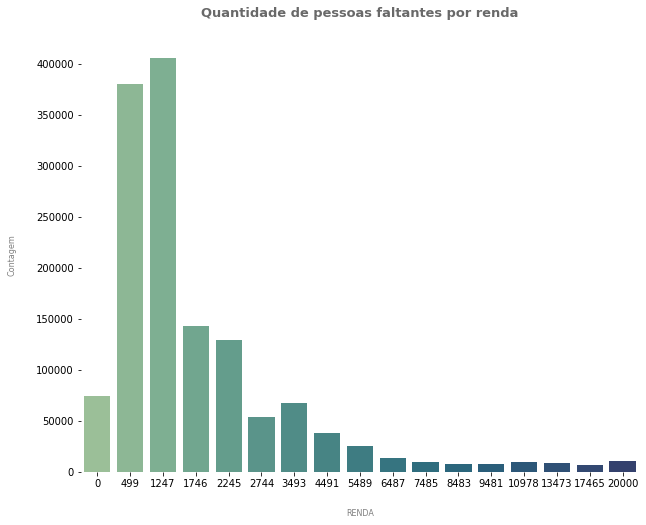

In [22]:
plt.figure(figsize=(10, 8))
sns.countplot(x= 'Q006', data= df1[(df1['TP_PRESENCA_CN'] == 0) | (df1['TP_PRESENCA_LC'] == 0)],palette = 'crest')
plt.title('Quantidade de pessoas faltantes por renda',pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold')
sns.despine(bottom = True, left=True)
plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
plt.ylabel('Contagem', color = 'grey', labelpad = 20, fontsize = 8)

In [23]:
print('Ponto de corte:',np.quantile(df1['Q006'][(df1['TP_PRESENCA_CN'] == 0) | (df1['TP_PRESENCA_LC'] == 0)],0.5))

Ponto de corte: 1247.0


Text(0, 0.5, 'Contagem')

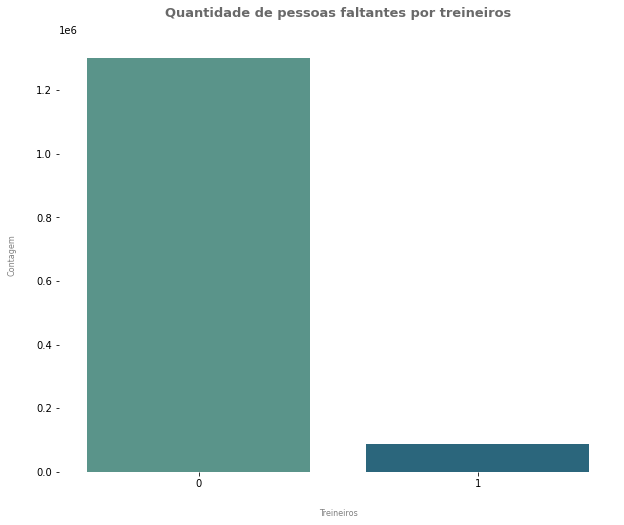

In [24]:
plt.figure(figsize=(10, 8))
sns.countplot(x= 'IN_TREINEIRO', data= df1[(df1['TP_PRESENCA_CN'] == 0) | (df1['TP_PRESENCA_LC'] == 0)],palette = 'crest')
plt.title('Quantidade de pessoas faltantes por treineiros',pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold')
sns.despine(bottom = True, left=True)
plt.xlabel('Treineiros', color = 'grey', labelpad = 20, fontsize = 8)
plt.ylabel('Contagem', color = 'grey', labelpad = 20, fontsize = 8)

Text(0, 0.5, 'Contagem')

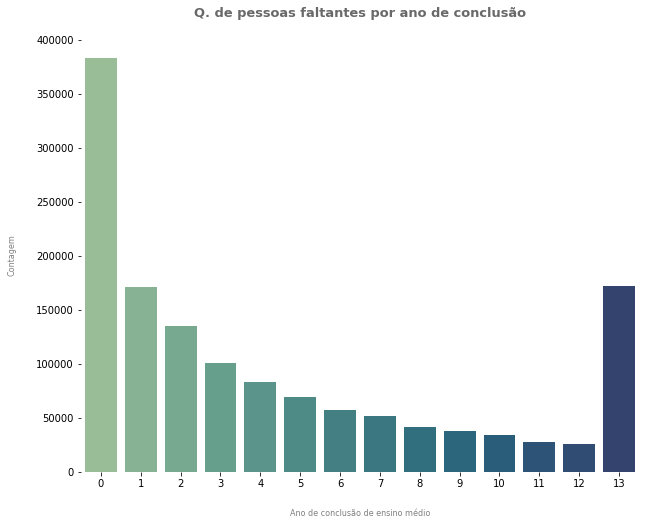

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(x= 'TP_ANO_CONCLUIU', data= df1[(df1['TP_PRESENCA_CN'] == 0) | (df1['TP_PRESENCA_LC'] == 0)],palette = 'crest')
plt.title('Q. de pessoas faltantes por ano de conclusão',pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold')
sns.despine(bottom = True, left=True)
plt.xlabel('Ano de conclusão de ensino médio', color = 'grey', labelpad = 20, fontsize = 8)
plt.ylabel('Contagem', color = 'grey', labelpad = 20, fontsize = 8)


Text(0, 0.5, 'Contagem')

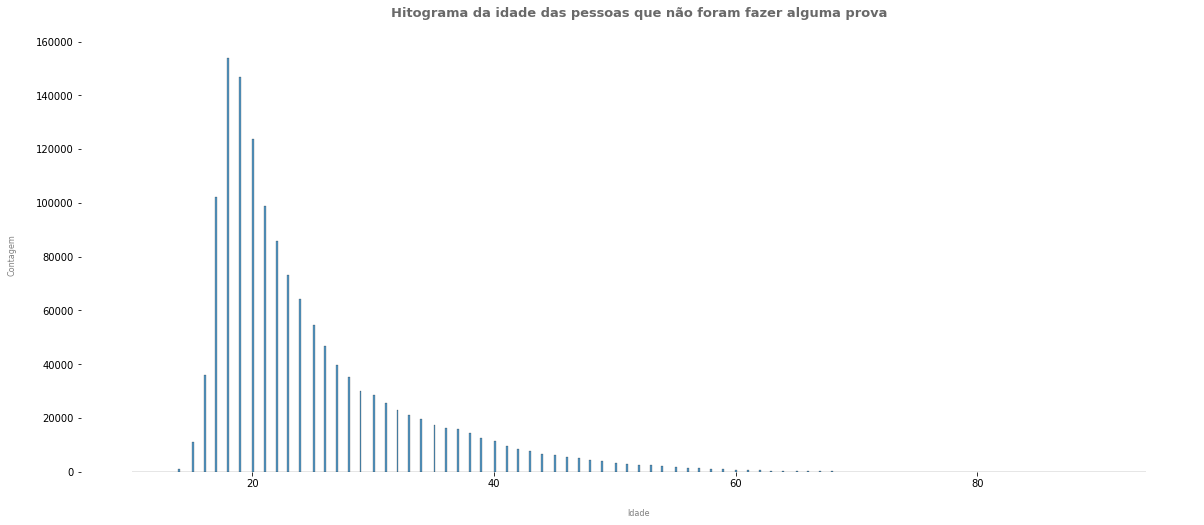

In [26]:
plt.figure(figsize=(20, 8))
sns.histplot(x= 'NU_IDADE', data= df1[(df1['TP_PRESENCA_CN'] == 0) | (df1['TP_PRESENCA_LC'] == 0)])
plt.title('Hitograma da idade das pessoas que não foram fazer alguma prova',pad = 20,fontsize = 13, color ='dimgrey', fontweight = 'bold')
sns.despine(bottom = True, left=True)
plt.xlabel('Idade', color = 'grey', labelpad = 20, fontsize = 8)
plt.ylabel('Contagem', color = 'grey', labelpad = 20, fontsize = 8)

* Sobre as pessoas que faltaram às provas, um ponto que se destaca é que a maioria das pessoas que não foram fazer a prova possuem uma renda de até 3943 reais.
 
* Logo de quantos porcentos esses dados representam do total de inscritos.


In [27]:
# criando um dataset de suporte

df_s = df1.copy()

In [28]:
df_s.head()

,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025
0,36.0,M,3,1,11,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,B,0,C,B
1,23.0,M,1,1,5,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,C,E,1247,A,B
2,39.0,F,3,1,13,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,E,499,A,B
3,25.0,F,1,1,4,1,0,NaN,1,1,1,1,483.8,503.6,537.3,392.0,460.0,C,E,2245,B,B
4,22.0,F,1,1,4,1,0,NaN,1,1,1,1,513.6,575.5,570.7,677.0,860.0,E,E,3493,B,B


In [29]:
df_s = df_s[(df1['TP_PRESENCA_CN'] == 0) | (df1['TP_PRESENCA_LC'] == 0)]

In [30]:
df_s.head()

,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025
0,36.0,M,3,1,11,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,B,0,C,B
1,23.0,M,1,1,5,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,C,E,1247,A,B
2,39.0,F,3,1,13,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,E,499,A,B
7,20.0,M,3,1,1,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,B,1746,A,B
8,20.0,F,1,1,1,1,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,C,1247,A,A


In [31]:
v = df_s['Q006'].value_counts()

v = v.iloc[np.argsort(v.index)]

In [32]:
v1 = df1['Q006'].value_counts()
v1 = v1.iloc[np.argsort(v1.index)]

In [33]:
g = v/v1

In [34]:
g

0        0.318397
499      0.298755
1247     0.309475
1746     0.285211
2245     0.271988
2744     0.238479
3493     0.223482
4491     0.197209
5489     0.178473
6487     0.173130
7485     0.163237
8483     0.166806
9481     0.165843
10978    0.161819
13473    0.164652
17465    0.165326
20000    0.183030
Name: Q006, dtype: float64

* Dos número de inscritos com uma determinada renda, as pessoas que tem a renda mais baixas são aquelas que mais desistem.

In [35]:
del df_s,v,v1

* Após as coclusẽos tiradas, agora será removido as pessoas que faltaram alguma prova.

In [36]:
df1 = df1[(df1['TP_PRESENCA_CN'] == 1) & (df1['TP_PRESENCA_CH'] == 1) | 
          (df1['TP_PRESENCA_LC'] == 1) & (df1['TP_PRESENCA_MT'] == 1)] # Removendo as pessoas que não foram fazer as provas

In [37]:
df1.shape

(3702008, 22)

In [38]:
df1.index = np.arange(df1.shape[0]) 

In [39]:
df1.drop(columns=['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT'],inplace = True)

In [40]:
df1.shape

(3702008, 18)

### <a name="secao_3.2"> 3.2 Pessoas que Tiraram 0 em alguma prova</a>.
 
* As pessoas que tiram zero em alguma prova também serão removidas, pelo motivo de que segundo as referência vista, é muito difícil de uma pessoa zerar alguma prova do Enem, menos a de redação. Logo, o motivo de uma pessoa tirar 0 pode só pode ser que ela entrego a prova em branco. Por isso que essas pessoas serão excluídas.
 
* Referências :
    
      https://educacao.uol.com.br/noticias/2014/10/31/voce-nunca-vai-tirar-zero-na-prova-do-enem-saiba-por-que.htm
 
* As pessoas que zeraram a redação também serão eliminadas. Isso será feito para manter o mesmo padrão do que já foi feito.
 
 
 
* Antes de eliminar esses dados, será visto a porcentagem de pessoas que tiram 0 em alguma prova.
 
 
 
 



In [41]:
print('\nPorcentagem de pessoas que tiraram 0 em alguma prova:')
print('Ciências Humanas: ',100*np.sum(df1['NU_NOTA_CH'] == 0)/dados)
print('Ciências Natureza:',100*np.sum(df1['NU_NOTA_CN'] == 0)/dados)
print('Linguagens:       ',100*np.sum(df1['NU_NOTA_LC'] == 0)/dados)
print('Matemática:       ',100*np.sum(df1['NU_NOTA_MT'] == 0)/dados)
print('Redação:          ',100*np.sum(df1['NU_NOTA_REDACAO'] == 0)/dados)


Porcentagem de pessoas que tiraram 0 em alguma prova:
Ciências Humanas:  0.05002678955187851
Ciências Natureza: 0.009067232943494654
Linguagens:        0.02233443958808856
Matemática:        0.012246652287317453
Redação:           2.0782019402308416


* Como existe uma baixa estatística destes dados, não será investigado o perfil das pessoas que não fizeram as provas. 

* Agora esses dados serão removidas diretamente.


In [42]:
#Escludindo todas as pessoas que tiram zero em alguma prova do Enem.
df1 = df1[df1['NU_NOTA_CN'] > 0]
df1 = df1[df1['NU_NOTA_CH'] > 0]
df1 = df1[df1['NU_NOTA_LC'] > 0]
df1 = df1[df1['NU_NOTA_MT'] > 0]
df1 = df1[df1['NU_NOTA_REDACAO'] > 0]

In [43]:
df1.shape

(3593586, 18)

In [44]:
df1.index = np.arange(df1.shape[0]) 

### <a name="secao_3.3"> 3.3 Treineiros </a > .


* As pessoas que marcaram a opção de treino são aquelas que não podem utilizar a nota do enem como  meio de ingresso para uma faculdade. Por esse motivo todas elas serão excluídas.
 
* A referência abaixo explica o que são as pessoas que marcaram a opção de treineiro.
 
      https://www.educamaisbrasil.com.br/educacao/enem/treineiros-enem-saiba-quem-sao-e-como-funciona-essa-modalidade
 
 
 
 
 
* Antes de excluir as pessoas que são treineiras pode existir algumas  incongruências no seu preenchimento. No caso:
 
 * Treineiros geralmente são pessoas que estão no ensino médio mas não vão concluí-lo esse ano. 
 
* Se existir uma pessoa que não tenha idade para ter saído do ensino médio e ainda esteja presente no banco de dados de não treineiros. Esses dados serão removidos.

* Por esse motivo será visto a distribuição de idade das pessoas que fizeram o Enem, daqueles que são treineiros e aqueles que não são. Para encontrar um ponto de corte para eliminar as incongruências dos dados de não treineiras. 
 
 
 



In [45]:
print('Porcentagem de pessoas que estão só treinando o seu conhecimento:',100*np.sum(df1['IN_TREINEIRO'] == 1)/dados)

Porcentagem de pessoas que estão só treinando o seu conhecimento: 9.932270517558441


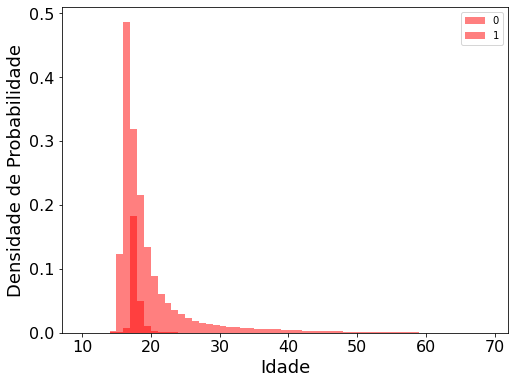

In [46]:
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.figure(figsize=(8, 6))
plt.hist(df1['NU_IDADE'][df1['IN_TREINEIRO'] == 0],bins = np.arange(10,70,1), density=True, color ='red',alpha = 0.5,label = '0')
plt.hist(df1['NU_IDADE'][df1['IN_TREINEIRO'] == 1],bins = np.arange(10,70,1), density=True, color ='red',alpha = 0.5,label = '1')

plt.legend()
plt.xlabel('Idade', fontsize = 18)
plt.ylabel('Densidade de Probabilidade', fontsize = 18)
plt.show()

* Pelo comportamento dos dados será considerado a moda das pessoas que são treineiros como ponto de corte.
 



In [47]:
print('Ponto de corte:',statistics.mode(df1['NU_IDADE'][df1['IN_TREINEIRO'] == 1]))
# vou olhar das pessoas que não foram treinar por curiosidade
print('As pessoas que não foram treinar:',statistics.mode(df1['NU_IDADE'][df1['IN_TREINEIRO'] == 0]))

Ponto de corte: 16.0
As pessoas que não foram treinar: 18.0


In [48]:
df1 = df1[df1['IN_TREINEIRO'] == 0] # removendo todas as pessoas que são treineiros 

* Antes de remover as pessoas com idade menores do de 17 anos. Será visto o histograma de NU_IDADE de novo para ver se o número de pessoas com 16 não é de alta ocorrencia. Pois se for o corte deve ser menor.

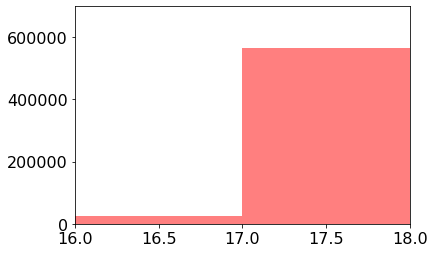

In [49]:
plt.hist(df1['NU_IDADE'],bins = np.arange(10,70,1), color ='red',alpha = 0.5,label = '0')
plt.xlim(16,18)
plt.show()

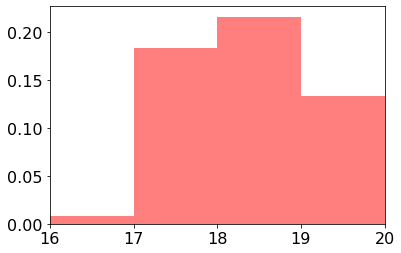

In [50]:
plt.hist(df1['NU_IDADE'][df1['IN_TREINEIRO'] == 0],bins = np.arange(10,70,1), density=True, color ='red',alpha = 0.5,label = '0')
plt.xlim(16,20)
plt.show()

* Realmete o corte será feito em 16 anos.

In [51]:
df1 = df1[df1['NU_IDADE'] >16]

In [52]:
df1.drop(columns=['IN_TREINEIRO'],inplace = True)

### <a name="secao_3.4"> 3.4 Pessoas que só vão concluir o ensino medio depois de 2019 </a > .

* Pode existir o caso da pessoa que não marcou como treino mas ela ainda não pode entrar em uma faculdade. Isso acontece porque ela ainda não terminou o ensino médio.


In [53]:
df1 = df1[df1['TP_ST_CONCLUSAO'] <3] # Excluindo as pessoas que não vão concluir o ensino médio em 2019

In [54]:
#df1.drop(columns=['TP_ST_CONCLUSAO'],inplace = True)

In [55]:
df1.head()

,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025
0,25.0,F,1,1,4,1,NaN,483.8,503.6,537.3,392.0,460.0,C,E,2245,B,B
1,22.0,F,1,1,4,1,NaN,513.6,575.5,570.7,677.0,860.0,E,E,3493,B,B
2,37.0,M,2,1,13,1,NaN,563.7,644.9,564.2,675.3,800.0,B,B,2245,B,B
3,22.0,F,3,1,5,1,NaN,484.6,488.4,507.2,594.7,600.0,E,B,499,A,A
4,17.0,M,1,2,0,2,NaN,543.9,548.1,502.5,480.7,400.0,E,E,2744,B,B


### <a name="secao_3.5"> 3.5 Tipo da escola </a > .
 
 
* Uma variável de grande importância é a TP_DEPENDENCIA_ADM_ESC devido que ela indica se a escola é municipal, estadual, federal ou particular.
 
* Isso é um indício para diferenciar a estrutura do colégio que a pessoa estudou. Devido que colégios particulares e federais tendem a ter infraestruturas melhores que os estaduais e municipais.
 
* Por causa desse motivo essa variável foi escolhida para medir a influência dos fatores sociais e econômicos nas notas do Enem.
* Logo, os dados faltantes dessa variável serão removidos.
 
* referências :
      * https://agenciabrasil.ebc.com.br/educacao/noticia/2016-10/enem-federais-militares-e-tecnicas-sao-publicas-com-melhor-desempenho
    
      * https://escolasexponenciais.com.br/tendencias-e-metricas/qual-a-influencia-da-infraestrutura-escolar-no-aprendizado/#:~:text=A%20rela%C3%A7%C3%A3o%20entre%20infraestrutura%20e,n%C3%A3o%20disp%C3%B5em%20de%20ambientes%20adequados.



In [56]:
print('Número de dados faltantes em TP_DEPENDENCIA_ADM_ESC :',100*df1['TP_DEPENDENCIA_ADM_ESC'].isna().sum(axis = 0)/df1.shape[0])

Número de dados faltantes em TP_DEPENDENCIA_ADM_ESC : 70.44273998813944


* Existe uma número consideravel de dados faltantes desses dados, talvez o seu uso não seja recomendados. Irei olhar agora o TP_ENSINO já que ele indica se o colegio é particular ou não.

In [57]:
print('Número de dados faltantes em  TP_ESCOLA :',100*df1['TP_ESCOLA'].isna().sum(axis = 0)/df1.shape[0])

Número de dados faltantes em  TP_ESCOLA : 0.0


* Mais para a opção de TP_ensino tem como preencher se a pessoa sabe ou não se a sua escola é particular. Se essa informação for preenchida como não sabe e tiver um dado faltando no TP_DEPENDENCIA_ADM_ESC. A variável TP_DEPENDENCIA_ADM_ESC será usada para avaliar o desempenho dos colégios em vez de TP_ENSINO.

In [58]:
df1['TP_ESCOLA'][df1['TP_DEPENDENCIA_ADM_ESC'].isna()].value_counts()

1    1901103
2     170530
3      78371
Name: TP_ESCOLA, dtype: int64

In [59]:
df1['TP_ESCOLA'].value_counts()

1    1901103
2     951629
3     199398
Name: TP_ESCOLA, dtype: int64

* O que foi levantado é o realmente o que acontece, por esse motivo será utlizada TP_DEPENDENCIA_ADM_ESC em vez de TP_ESCOLA para avaliar os dados.
 
* Isso será feito pelo motivo de que mesmo que haja uma grande quantidade de dados faltantes nessa variável. Ainda existe uma grande quantidade de dados no dataset. Conforme esta sendo mostrado abaixo:
 
 
 



In [60]:
print('Número de dados restante:',df1.shape[0] - 1859669) 

Número de dados restante: 1192461


In [61]:
df1.drop(columns=['TP_ESCOLA'],inplace = True)

### <a name="secao_3.6"> 3.6 Dados faltantes </a>.



* Dados faltantes

In [62]:
print('Colunas com dados faltantes :',df1.columns[df1.isna().sum(axis = 0)>0])

Colunas com dados faltantes : Index(['TP_DEPENDENCIA_ADM_ESC'], dtype='object')


In [63]:
df1.isna().sum(axis = 0)

NU_IDADE                        0
TP_SEXO                         0
TP_COR_RACA                     0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_DEPENDENCIA_ADM_ESC    2150004
NU_NOTA_CN                      0
NU_NOTA_CH                      0
NU_NOTA_LC                      0
NU_NOTA_MT                      0
NU_NOTA_REDACAO                 0
Q001                            0
Q002                            0
Q006                            0
Q024                            0
Q025                            0
dtype: int64

### <a name="secao_3.7"> 3.7 Dados não preenchidos </a>.
 
* Como objetivo é comparar o impacto dos fatores sociais e econômicos na nota do enem, os alunos que não quiserem divulgar essas informações serão excluídas do conjunto de dados.


In [64]:
# 'Q001'
# H representa o aluno que não sabe a escolaridade do pai
df1 = df1[df1['Q001'] != 'H']
# 'Q002'
# H representa o aluno que não sabe a escolaridade do mae
df1 = df1[df1['Q002'] != 'H']
# 'Q006'
#O valor é de pessoas que não optaram por colocar sua renda
df1 = df1[df1['Q006']!=0]
# TP_COR_RACA
# Reça não declarada
df1 = df1[df1['TP_COR_RACA'] != 0]




In [65]:
df1['Q006'].value_counts()

1247     692692
499      644208
1746     272687
2245     267990
3493     176830
2744     127231
4491     109069
5489      83485
6487      45301
7485      33105
10978     32451
20000     26555
13473     26357
8483      24368
9481      23551
17465     21600
Name: Q006, dtype: int64

In [66]:
df1.shape

(2607480, 16)

# <a name="secao_4.0"> 4.0 Remapeamento das classes </a > .
 
 
### <a name="secao_4.1"> 4.1  Cor/raça  </a > 
 
* A junção das pessoas com cor/raça preta e parda é classificada pelo ibge como negra e estudos mostram que 75 % deles estão entre os mais pobres que moram na região de periferia. Para evidenciar este fator as pessoas com cor/raça preta e parda serão transformadas como negras.
 
 
* Referência:
 
      * https://noticias.uol.com.br/cotidiano/ultimas-noticias/2019/11/13/percentual-de-negros-entre-10-mais-pobre-e-triplo-do-que-entre-mais-ricos.htm
 
 
 



In [67]:
df1['TP_COR_RACA'].value_counts()

3    1212041
1     988220
2     333360
4      59474
5      14385
Name: TP_COR_RACA, dtype: int64

In [68]:

df1['TP_COR_RACA'][df1['TP_COR_RACA'] == 2] = 6
df1['TP_COR_RACA'][df1['TP_COR_RACA'] == 3] = 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
dados = np.unique(df1['TP_COR_RACA'])

In [70]:
for i in range(len(dados)):
  print('Classe ',dados[i],':',np.sum(df1['TP_COR_RACA'] == dados[i])/df1.shape[0])

Classe  1 : 0.3789942780002148
Classe  4 : 0.022808995658643593
Classe  5 : 0.005516820838510746
Classe  6 : 0.5926799055026309


* As classes 6 e 1 apresentaram a maior porcentagem dos dados sendo que a diferença entre essas duas para as demais são alarmantes. Por esse motivo elas serão reagrupadas nas demais classes.
 
* A classe Indígena será agrupada na classe de cor/raça Preta devido que existe estudo do ibge que trata elas como iguais.
 
* A classe amarela se trata da asiática e por aparência elas se assemelham mais a cor/raça branca eles serão agrupados nessa classe.


In [71]:
df1['TP_COR_RACA'][df1['TP_COR_RACA'] == 5] = 6
df1['TP_COR_RACA'][df1['TP_COR_RACA'] == 4] = 6

df1['TP_COR_RACA'][df1['TP_COR_RACA'] == 6] = 0
df1['TP_COR_RACA'][df1['TP_COR_RACA'] == 6] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [72]:
df1['TP_COR_RACA'].value_counts()

0    1619260
1     988220
Name: TP_COR_RACA, dtype: int64

* O remapeamento :  
  * 0 -> Cor e raça preta
  * 1 -> Cor e raça branca 

* O remapeamento final.

In [73]:
df1['TP_COR_RACA'] = df1['TP_COR_RACA'].map({0: 'Preto', 1: 'Branco'})

In [74]:
df1['Raça'] = df1['TP_COR_RACA']

In [75]:
df1.drop(columns=['TP_COR_RACA'],inplace = True)

In [76]:
df1.head()

,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Raça
0,25.0,F,1,4,NaN,483.8,503.6,537.3,392.0,460.0,C,E,2245,B,B,Branco
1,22.0,F,1,4,NaN,513.6,575.5,570.7,677.0,860.0,E,E,3493,B,B,Branco
2,37.0,M,1,13,NaN,563.7,644.9,564.2,675.3,800.0,B,B,2245,B,B,Preto
3,22.0,F,1,5,NaN,484.6,488.4,507.2,594.7,600.0,E,B,499,A,A,Preto
4,17.0,M,2,0,NaN,543.9,548.1,502.5,480.7,400.0,E,E,2744,B,B,Branco


### <a name="secao_4.2"> 4.2  Escolaridade dos pais </a >






* Legenda dos metadados do enem:
 
 * A - > Nunca estudou.
 * B - > Não completou a 4ª série/5º ano do Ensino Fundamental.
 * C - > Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
 * D - > Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
 * E - > Completou o Ensino Médio, mas não completou a Faculdade.
 * F - > Completou a faculdade, mas não completou a Pós-graduação.
 * G - > Completou a Pós-graduação.


In [77]:
np.unique(df1['Q001'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [78]:
labels = ['N.','4ª/5º','8ª/9º','Médio','Fac.','Pós.','Ter. a Pós.']

In [79]:
df1['Q001'] = df1['Q001'].map({'A':1,'B':2,'C':3,'D':4, 'E':5,'F':6,'G':7})

df1['Q002'] = df1['Q002'].map({'A':1,'B':2,'C':3,'D':4, 'E':5,'F':6,'G':7})

In [80]:
df1['Escolaridade do pai']= df1['Q001']
df1['Escolaridade da mãe']= df1['Q002']

In [81]:
df1.drop(columns=['Q001','Q002'],inplace = True)

In [82]:
df1.head()

,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q024,Q025,Raça,Escolaridade do pai,Escolaridade da mãe
0,25.0,F,1,4,NaN,483.8,503.6,537.3,392.0,460.0,2245,B,B,Branco,3,5
1,22.0,F,1,4,NaN,513.6,575.5,570.7,677.0,860.0,3493,B,B,Branco,5,5
2,37.0,M,1,13,NaN,563.7,644.9,564.2,675.3,800.0,2245,B,B,Preto,2,2
3,22.0,F,1,5,NaN,484.6,488.4,507.2,594.7,600.0,499,A,A,Preto,5,2
4,17.0,M,2,0,NaN,543.9,548.1,502.5,480.7,400.0,2744,B,B,Branco,5,5


### <a name="secao_4.3"> 4.3  Computador e internet.  </a > 







* Legenda do Q025:

  * A - > Não
  * B - > Sim

* Legenda do Q024:

  * A - > Não.
  * B - > Sim, um.
  * C - > Sim, dois.
  * D - > Sim, três.
  * E - > Sim, quatro ou mais.

In [83]:
# Vendo se todas as pessoas que têm computador tem acesso a internet
print('Número de pessoas que têm acesso a internet e ao computador:',np.sum((df1['Q025'] == 'B') & (df1['Q024'] != 'A')))
# 
print('Número de pessoas que têm acesso a internet e ao computador:',np.sum((df1['Q025'] != 'A')))

Número de pessoas que têm acesso a internet e ao computador: 1434152
Número de pessoas que têm acesso a internet e ao computador: 2095721


* Será criado uma variável onde vai ter as seguintes classes:
 
 * 0 -> A pessoa não tem internet nem computador
 * 1 -> A pessoa só tem computador
 * 2 -> A pessoas tem computador e internet
 
* Essa nova classe será chamada de Q026
 



In [84]:
np.unique(df1['Q024'])

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [85]:
df1['Q024'] = df1['Q024'].map({'A': 0, 'B': 1,'C':1, 'D':1,'E':1})
df1['Q025'] = df1['Q025'].map({'A': 0, 'B': 1})

In [86]:
df1['Q026'] = df1['Q024'] + df1['Q025']

In [87]:
col = ['Q024','Q025']
df1.drop(columns=col,inplace = True)

In [88]:
df1['Q026'] = df1['Q026'].map({0: 'N.', 1: 'Comp.',2:'Comp. Internet'})

In [89]:
df1['Internet'] = df1['Q026']

In [90]:
df1.head()

,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Raça,Escolaridade do pai,Escolaridade da mãe,Q026,Internet
0,25.0,F,1,4,NaN,483.8,503.6,537.3,392.0,460.0,2245,Branco,3,5,Comp. Internet,Comp. Internet
1,22.0,F,1,4,NaN,513.6,575.5,570.7,677.0,860.0,3493,Branco,5,5,Comp. Internet,Comp. Internet
2,37.0,M,1,13,NaN,563.7,644.9,564.2,675.3,800.0,2245,Preto,2,2,Comp. Internet,Comp. Internet
3,22.0,F,1,5,NaN,484.6,488.4,507.2,594.7,600.0,499,Preto,5,2,N.,N.
4,17.0,M,2,0,NaN,543.9,548.1,502.5,480.7,400.0,2744,Branco,5,5,Comp. Internet,Comp. Internet


In [91]:
df1.drop(columns=['Internet'],inplace = True)

### <a name="secao_4.4"> 4.4  Nota média.  </a > 


* As análises serão avaliadas de acordo com a nota media

In [92]:
col = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

In [93]:
col

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [94]:
df1['Nota media'] = np.mean(df1[col],axis = 1) # dados de 

# para impedir o vazamento de dados as notas das provas seram excluidas



In [95]:
df1.head()

,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Raça,Escolaridade do pai,Escolaridade da mãe,Q026,Nota media
0,25.0,F,1,4,NaN,483.8,503.6,537.3,392.0,460.0,2245,Branco,3,5,Comp. Internet,475.34
1,22.0,F,1,4,NaN,513.6,575.5,570.7,677.0,860.0,3493,Branco,5,5,Comp. Internet,639.36
2,37.0,M,1,13,NaN,563.7,644.9,564.2,675.3,800.0,2245,Preto,2,2,Comp. Internet,649.62
3,22.0,F,1,5,NaN,484.6,488.4,507.2,594.7,600.0,499,Preto,5,2,N.,534.98
4,17.0,M,2,0,NaN,543.9,548.1,502.5,480.7,400.0,2744,Branco,5,5,Comp. Internet,495.04


### <a name="secao_4.5"> 4.5  Sexo.  </a > 




In [96]:
df1['TP_SEXO'] = df1['TP_SEXO'].map({'F': 'Fêmea', 'M': 'Macho'})

In [97]:
df1['Sexo'] = df1['TP_SEXO']

In [98]:
df1.drop(columns=['TP_SEXO'],inplace = True)

In [99]:
df1.head()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Raça,Escolaridade do pai,Escolaridade da mãe,Q026,Nota media,Sexo
0,25.0,1,4,NaN,483.8,503.6,537.3,392.0,460.0,2245,Branco,3,5,Comp. Internet,475.34,Fêmea
1,22.0,1,4,NaN,513.6,575.5,570.7,677.0,860.0,3493,Branco,5,5,Comp. Internet,639.36,Fêmea
2,37.0,1,13,NaN,563.7,644.9,564.2,675.3,800.0,2245,Preto,2,2,Comp. Internet,649.62,Macho
3,22.0,1,5,NaN,484.6,488.4,507.2,594.7,600.0,499,Preto,5,2,N.,534.98,Fêmea
4,17.0,2,0,NaN,543.9,548.1,502.5,480.7,400.0,2744,Branco,5,5,Comp. Internet,495.04,Macho


### <a name="secao_4.6"> 4.6  Colégio.  </a > 

In [100]:
df1['TP_DEPENDENCIA_ADM_ESC'] = df1['TP_DEPENDENCIA_ADM_ESC'].map({1: 'Federal', 2: 'Estadual',3:'Municipal',4:'Particular'})

In [101]:
df1['Colégio'] = df1['TP_DEPENDENCIA_ADM_ESC']

In [102]:
df1.drop(columns=['Colégio'],inplace = True)

### <a name="secao_4.7"> 4.7  Renda.  </a > 

In [103]:
df1['Renda'] = df1['Q006']

In [104]:
df1.drop(columns=['Q006'],inplace = True)

In [105]:
df1.head()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Raça,Escolaridade do pai,Escolaridade da mãe,Q026,Nota media,Sexo,Renda
0,25.0,1,4,NaN,483.8,503.6,537.3,392.0,460.0,Branco,3,5,Comp. Internet,475.34,Fêmea,2245
1,22.0,1,4,NaN,513.6,575.5,570.7,677.0,860.0,Branco,5,5,Comp. Internet,639.36,Fêmea,3493
2,37.0,1,13,NaN,563.7,644.9,564.2,675.3,800.0,Preto,2,2,Comp. Internet,649.62,Macho,2245
3,22.0,1,5,NaN,484.6,488.4,507.2,594.7,600.0,Preto,5,2,N.,534.98,Fêmea,499
4,17.0,2,0,NaN,543.9,548.1,502.5,480.7,400.0,Branco,5,5,Comp. Internet,495.04,Macho,2744



# <a name="secao_5"> 5  Salvando os novos dados.

In [106]:
df1.to_csv('/content/drive/My Drive/desafio semantix/dados1.csv',sep=';' ,encoding='iso-8859-1', index = False)

 
# <a name="secao_6"> 6  Conclusão.
 
* Nesta parte do projeto foi possível selecionar as variáveis de interesse para análise social e econômica dos alunos do enem.
 
* Nessa parte também ocorreram algumas análises interessantes como:
  
      Porcentagem de escritos que não foram fazer a prova em nenhum dia: 22.766408845851153
      Porcentagem de inscritos foram fazer a prova no primeiro dia mais não foram no segundo: 4.302912308866851
      Porcentagem de inscritos foram fazer a prova no segundo dia mais não foram no primeiro: 0.15753826588188655
      Porcentagem de inscritos que faltaram em pelo menos um prova: 27.299201023694526
  
      Porcentagem de pessoas que tiraram 0 em alguma prova:
      Ciências Humanas:  0.11579366746021309
      Ciências Natureza: 0.011893383471337142
      Linguagens:        0.06058560194062336
      Matemática:        0.014660655863182912
      Redação:           2.8200468277441626
 
      Porcentagem de pessoas que estão só treinando o seu conhecimento: 12.102754122941473
 
* E foi feita a análise das pessoas que não foram fazer as provas. Onde a principal característica dessas pessoas é que aqueles que têm renda até de 2000 mil reais, são as que mais faltaram nas provas.
 
 
 

